In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Tweets.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [4]:
data.shape

(14640, 15)

In [5]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


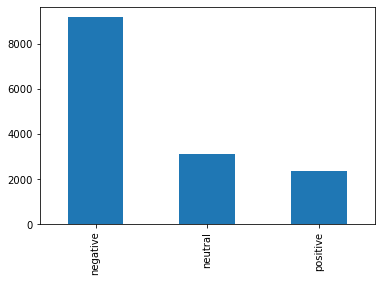

In [6]:
data.airline_sentiment.value_counts().plot(kind='bar')

In [7]:
sentiment_counts=data.airline_sentiment.value_counts()

In [8]:
data.tweet_id.count()

14640

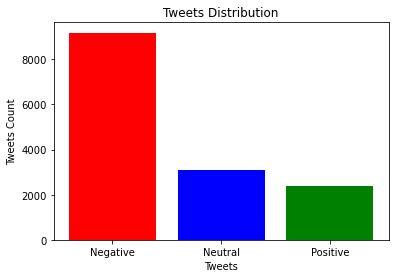

In [9]:
index=[1,2,3]
plt.bar(index,sentiment_counts,color=['r','b','g'])
plt.xticks(index,['Negative','Neutral','Positive'])
plt.xlabel('Tweets')
plt.ylabel('Tweets Count')
plt.title('Tweets Distribution')
plt.show()

In [10]:
new_data = data.copy()
new_data = new_data[new_data['airline_sentiment_confidence'] > 0.65]
new_data['sentiment'] = new_data['airline_sentiment'].apply(lambda x: 1 if x=='negative' else 0)

In [11]:
new_data.shape

(13651, 16)

In [12]:
new_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),1
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),1


In [13]:
new_data = new_data.loc[:, ['text', 'sentiment']]

In [14]:
new_data.head()

,text,sentiment
0,@VirginAmerica What @dhepburn said.,0
2,@VirginAmerica I didn't today... Must mean I n...,0
3,@VirginAmerica it's really aggressive to blast...,1
4,@VirginAmerica and it's a really big bad thing...,1
5,@VirginAmerica seriously would pay $30 a fligh...,1


In [15]:
new_data["text"][2]

"@VirginAmerica I didn't today... Must mean I need to take another trip!"

In [16]:
new_data["text"]=new_data["text"].apply(lambda x:x.lower())


In [17]:
new_data["text"][2]

"@virginamerica i didn't today... must mean i need to take another trip!"

In [18]:
new_data["text"]=new_data["text"].apply(lambda x:x.split())

In [19]:
new_data["text"][2]

['@virginamerica',
 'i',
 "didn't",
 'today...',
 'must',
 'mean',
 'i',
 'need',
 'to',
 'take',
 'another',
 'trip!']

In [20]:
new_data["text"]=new_data["text"].apply(lambda x:" ".join(x))

In [21]:
new_data["text"][2]

"@virginamerica i didn't today... must mean i need to take another trip!"

In [22]:
new_data.head()

,text,sentiment
0,@virginamerica what @dhepburn said.,0
2,@virginamerica i didn't today... must mean i n...,0
3,@virginamerica it's really aggressive to blast...,1
4,@virginamerica and it's a really big bad thing...,1
5,@virginamerica seriously would pay $30 a fligh...,1


In [23]:
import nltk

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
from nltk.tokenize import TweetTokenizer      #word_tokenizer(similler)
from nltk.stem import SnowballStemmer        #better then porter steemer
sn=SnowballStemmer('english', ignore_stopwords=False)

In [26]:
def preprocessing(texter):
    
    texter=nltk.word_tokenize(texter)
    
    y=[]
    
    for i in texter:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
            
    texter=y[:]
    y.clear()
    
    for i in texter:
        y.append(sn.stem(i))
    return " ".join(y)

In [27]:
new_data["text"]=new_data["text"].apply(preprocessing)

In [28]:
new_data.head()

,text,sentiment
0,virginamerica dhepburn said,0
2,virginamerica n't today ... must mean need tak...,0
3,virginamerica 's realli aggress blast obnoxi `...,1
4,virginamerica 's realli big bad thing,1
5,virginamerica serious would pay 30 flight seat...,1


In [29]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc , roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score

from sklearn.pipeline import make_pipeline, Pipeline

In [30]:
tfid=TfidfVectorizer(analyzer='word',ngram_range=(1, 1))

In [31]:
x=tfid.fit_transform(new_data["text"]).toarray()

In [32]:
y=new_data["sentiment"]

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.33, random_state=40)


In [34]:
print(x_train.shape,x_test.shape)

(9146, 11941) (4505, 11941)


In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [36]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [37]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.5795782463928968
[[1291  287]
 [1607 1320]]
0.8214063472308649


In [38]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.7820199778024417
[[ 644  934]
 [  48 2879]]
0.7550485182271177


In [39]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8284128745837958
[[1073  505]
 [ 268 2659]]
0.8403919089759798


In [40]:
from sklearn.ensemble import RandomForestClassifier
rn=RandomForestClassifier(n_estimators=100)
rn.fit(x_train,y_train)
y_pred3 = rn.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8221975582685904
[[1024  554]
 [ 247 2680]]
0.8286951144094001


In [41]:
from sklearn.tree import DecisionTreeClassifier
de=DecisionTreeClassifier()
de.fit(x_train,y_train)
y_pred3 = de.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.7416204217536071
[[1014  564]
 [ 600 2327]]
0.8049117952265652


In [42]:
from sklearn.ensemble import BaggingClassifier
be=BaggingClassifier()
be.fit(x_train,y_train)
y_pred3 = be.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.774472807991121
[[1013  565]
 [ 451 2476]]
0.8142058533377179


In [43]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred3 = ada.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7889012208657048
[[1087  491]
 [ 460 2467]]
0.8340094658553077


In [44]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_pred3 =etc.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.832630410654828
[[1064  514]
 [ 240 2687]]
0.8394251796313652


In [47]:
import pickle
tfidf=pickle.dump(tfid,open('vector.pkl','wb'))
model=pickle.dump(etc,open('algorithm.pkl','wb'))